# Time Series Analysis and Forecasting with Prophet
* This dataset is downloaded from kaggle
* The link for the page is - [kaggle_link](https://www.kaggle.com/ravi07bec/ravi-ts)
* I'll upload the dataset along with the file

In [1]:
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline
# For statistics library
    from statsmodels.distributions.empirical_distribution import ECDF
# For time series analysis
    from statsmodels.tsa.seasonal import seasonal_decompose
    from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# prophet by Facebook
# This library you have to install from pip or conda
# conda install -c conda-forge fbprophet
    from fbprophet import Prophet    
    
    print('All the libraries are imported successfully')
except:
    print('Please install the following libraries')

All the libraries are imported successfully


In [4]:
# Loading our Data
train = pd.read_csv("rossman_train.csv")
'''
# Load the additional store data
file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/rossman_store.csv"
store = pd.read_csv(file_name, low_memory=False)

# time series as indexes
train.index
'''


C:\Users\Dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


'\n# Load the additional store data\nfile_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/rossman_store.csv"\nstore = pd.read_csv(file_name, low_memory=False)\n\n# time series as indexes\ntrain.index\n'

In [5]:
train.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

### Inorder to avoid the warning and make data more useful

In [11]:
train = pd.read_csv("rossman_train.csv", parse_dates = True, low_memory = False, index_col = 'Date')
train.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          5   5263        555     1      1            0   
2015-07-31      2          5   6064        625     1      1            0   
2015-07-31      3          5   8314        821     1      1            0   
2015-07-31      4          5  13995       1498     1      1            0   
2015-07-31      5          5   4822        559     1      1            0   

            SchoolHoliday  
Date                       
2015-07-31              1  
2015-07-31              1  
2015-07-31              1  
2015-07-31              1  
2015-07-31              1

In [12]:
store = pd.read_csv("rossman_store.csv", low_memory=False)
store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [13]:
print(f'Total Shape of Store is: {store.shape} \nand Total Shape for train is {train.shape}')

Total Shape of Store is: (1115, 10) 
and Total Shape for train is (1017209, 8)


### Inorder for more granularity, feature engineer the dates

In [14]:
train.head(3)

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          5   5263        555     1      1            0   
2015-07-31      2          5   6064        625     1      1            0   
2015-07-31      3          5   8314        821     1      1            0   

            SchoolHoliday  
Date                       
2015-07-31              1  
2015-07-31              1  
2015-07-31              1

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [19]:
train.index

DatetimeIndex(['2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=1017209, freq=None)

In [21]:
# Since dtype of index is datetime, we can apply date and time functions
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear

<ipython-input-21-ccdd93d184b2>:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  train['WeekOfYear'] = train.index.weekofyear


In [22]:
train.head(3)

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          5   5263        555     1      1            0   
2015-07-31      2          5   6064        625     1      1            0   
2015-07-31      3          5   8314        821     1      1            0   

            SchoolHoliday  Year  Month  Day  WeekOfYear  
Date                                                     
2015-07-31              1  2015      7   31          31  
2015-07-31              1  2015      7   31          31  
2015-07-31              1  2015      7   31          31

In [23]:
train['SalesPerCustomer'] = train['Sales']/train['Customers']

In [25]:
train.head(2)

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          5   5263        555     1      1            0   
2015-07-31      2          5   6064        625     1      1            0   

            SchoolHoliday  Year  Month  Day  WeekOfYear  SalesPerCustomer  
Date                                                                       
2015-07-31              1  2015      7   31          31          9.482883  
2015-07-31              1  2015      7   31          31          9.702400

### Inorder to visualise the jump, lets plot cummulative plot

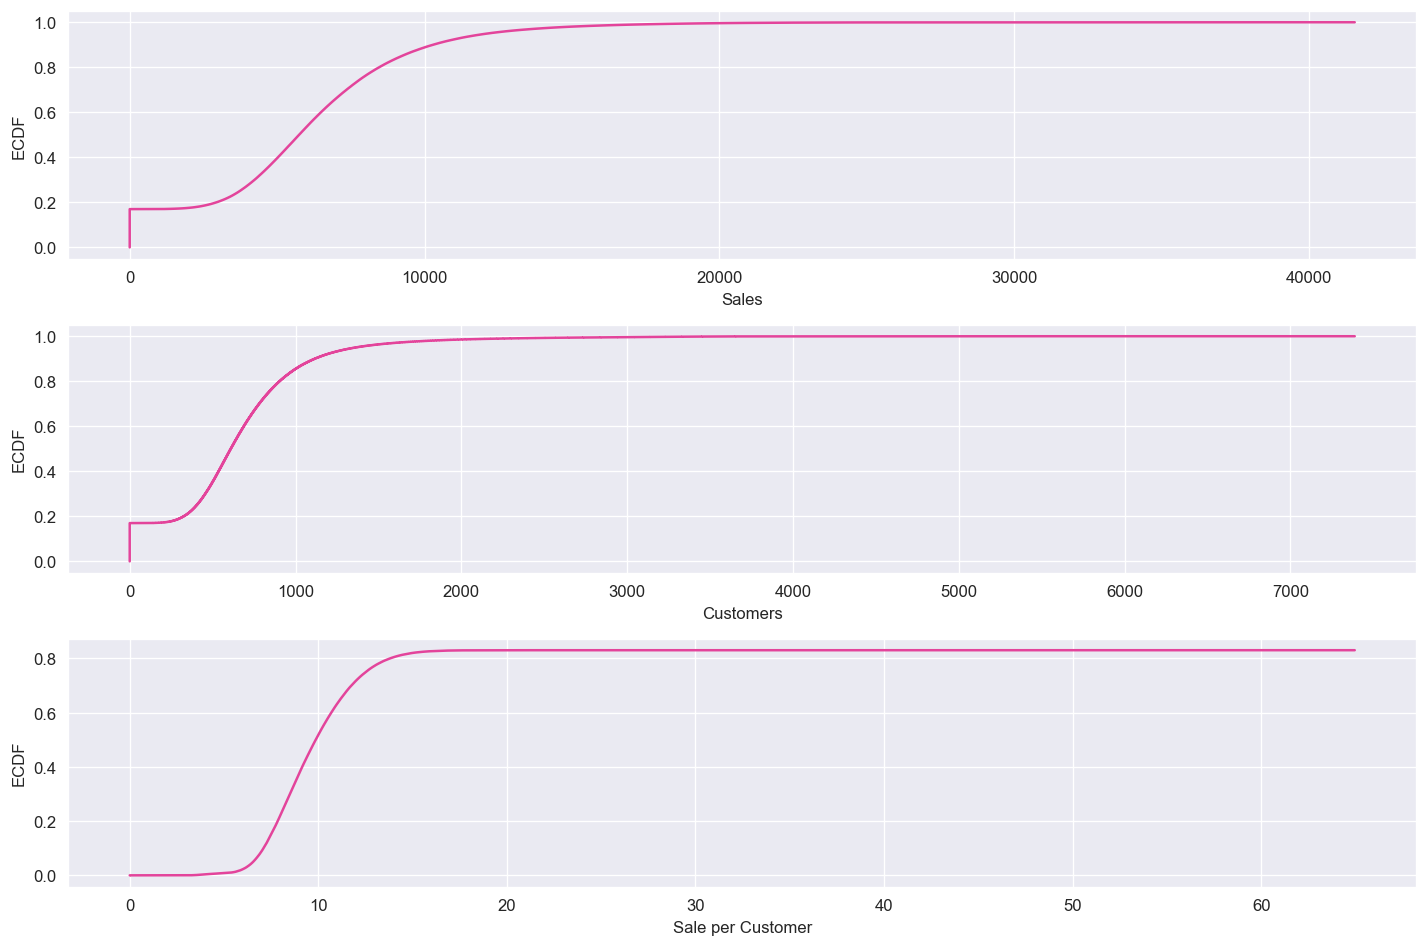

In [42]:
sns.set_style('darkgrid')

plt.figure(figsize=(12,8), dpi = 120)
plt.subplot(3, 1, 1)
cdf = ECDF(train['Sales'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = '#e3449b')
plt.xlabel('Sales')
plt.ylabel('ECDF')

# plot second ECDF  
plt.subplot(3, 1, 2)
cdf = ECDF(train['Customers'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = '#e3449b')
plt.xlabel('Customers')
plt.ylabel('ECDF')

# plot third ECDF  
plt.subplot(3, 1, 3)
cdf = ECDF(train['SalesPerCustomer'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = '#e3449b')
plt.xlabel('Sale per Customer')
plt.ylabel('ECDF')
plt.tight_layout()

In [44]:
# closed stores
train[(train.Open == 0) & (train.Sales == 0)].head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31    292          5      0          0     0      1            0   
2015-07-31    876          5      0          0     0      1            0   
2015-07-30    292          4      0          0     0      1            0   
2015-07-30    876          4      0          0     0      1            0   
2015-07-29    292          3      0          0     0      1            0   

            SchoolHoliday  Year  Month  Day  WeekOfYear  SalesPerCustomer  
Date                                                                       
2015-07-31              1  2015      7   31          31               NaN  
2015-07-31              1  2015      7   31          31               NaN  
2015-07-30              1  2015      7   30          31               NaN  
2015-07-30              1  2015      7   30          31               NaN  
2015-07-29              1  2015      7   29          31               NaN

In [45]:
print(train[(train.Open == 0) & (train.Sales == 0)].shape)

(172817, 13)


### Checking for any open store but sales are zero

In [46]:
train[(train.Open != 0) & (train.Sales == 0)].head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-05-15    971          5      0          0     1      0            0   
2015-03-26    674          4      0          0     1      0            0   
2015-02-05    699          4      0          0     1      1            0   
2014-10-01    708          3      0          0     1      1            0   
2014-09-22    357          1      0          0     1      0            0   

            SchoolHoliday  Year  Month  Day  WeekOfYear  SalesPerCustomer  
Date                                                                       
2015-05-15              1  2015      5   15          20               NaN  
2015-03-26              0  2015      3   26          13               NaN  
2015-02-05              0  2015      2    5           6               NaN  
2014-10-01              0  2014     10    1          40               NaN  
2014-09-22              0  2014      9   22          39               NaN

In [47]:
print(train[(train.Open != 0) & (train.Sales == 0)].shape)

(54, 13)


### Removing these stores to avoid discrepency

In [48]:
train = train[(train["Open"] != 0) & (train['Sales'] != 0)]

In [49]:
train.head(3)

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
Date                                                                       
2015-07-31      1          5   5263        555     1      1            0   
2015-07-31      2          5   6064        625     1      1            0   
2015-07-31      3          5   8314        821     1      1            0   

            SchoolHoliday  Year  Month  Day  WeekOfYear  SalesPerCustomer  
Date                                                                       
2015-07-31              1  2015      7   31          31          9.482883  
2015-07-31              1  2015      7   31          31          9.702400  
2015-07-31              1  2015      7   31          31         10.126675

In [50]:
train.shape

(844338, 13)

# Let's clean the data 

In [51]:
train.isnull().sum()

Store               0
DayOfWeek           0
Sales               0
Customers           0
Open                0
Promo               0
StateHoliday        0
SchoolHoliday       0
Year                0
Month               0
Day                 0
WeekOfYear          0
SalesPerCustomer    0
dtype: int64

<AxesSubplot:>

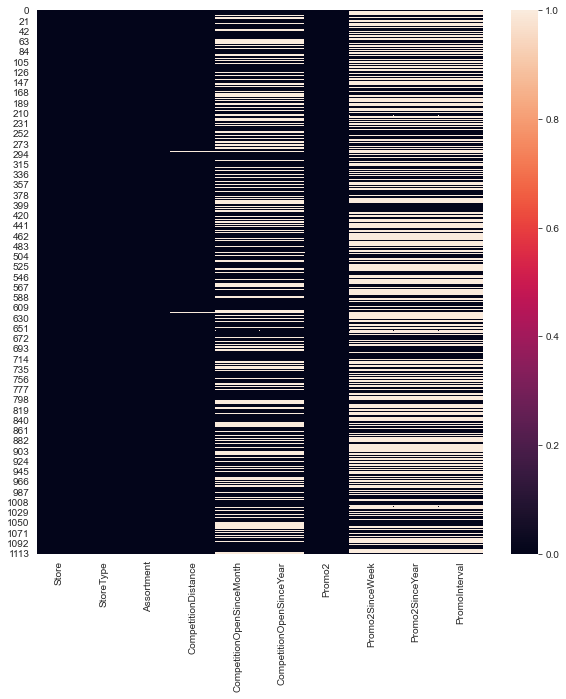

In [56]:
plt.figure(figsize = (10,10))
sns.heatmap(store.isnull(), cbar = 'rainbow')

In [52]:
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [58]:
store[store['CompetitionDistance'].isna()]

Store StoreType Assortment  CompetitionDistance  \
290    291         d          a                  NaN   
621    622         a          c                  NaN   
878    879         d          a                  NaN   

     CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
290                        NaN                       NaN       0   
621                        NaN                       NaN       0   
878                        NaN                       NaN       1   

     Promo2SinceWeek  Promo2SinceYear    PromoInterval  
290              NaN              NaN              NaN  
621              NaN              NaN              NaN  
878              5.0           2013.0  Feb,May,Aug,Nov

<AxesSubplot:>

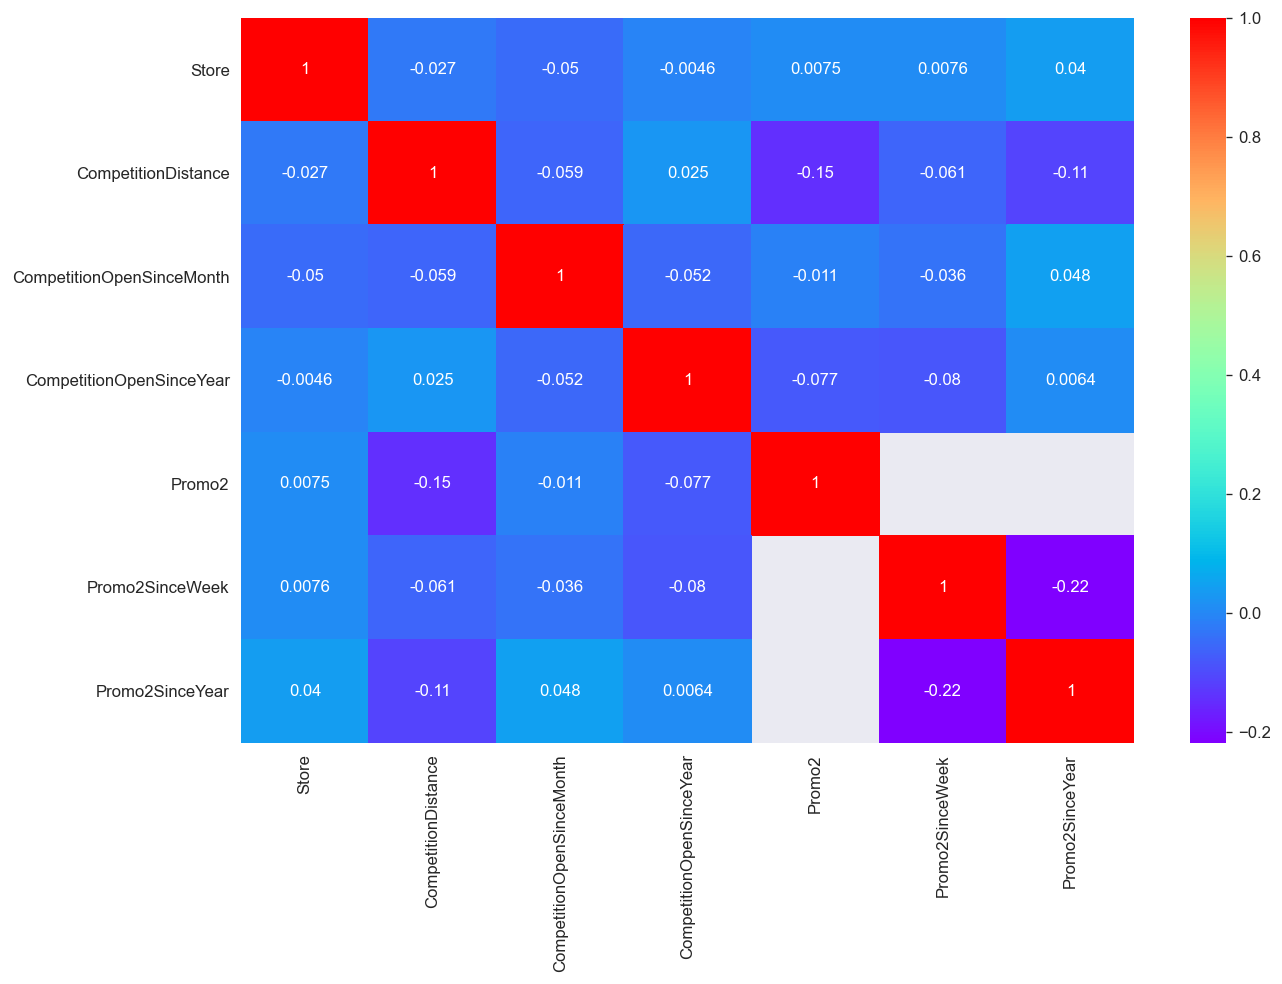

In [63]:
plt.figure(figsize=(12,8), dpi = 120)
sns.heatmap(store.corr(),cmap = 'rainbow',annot=True)

### We don't have enough correlation among the columns, so best option to fill NA values is using Median values for respective columns

In [64]:
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

In [65]:
store[store['Promo2SinceWeek'].isna()]

Store StoreType Assortment  CompetitionDistance  \
0         1         c          a               1270.0   
3         4         c          c                620.0   
4         5         a          a              29910.0   
5         6         a          a                310.0   
6         7         a          c              24000.0   
...     ...       ...        ...                  ...   
1107   1108         a          a                540.0   
1109   1110         c          c                900.0   
1111   1112         c          c               1880.0   
1112   1113         a          c               9260.0   
1113   1114         a          c                870.0   

      CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                           9.0                    2008.0       0   
3                           9.0                    2009.0       0   
4                           4.0                    2015.0       0   
5                          12.0                    2013.0       0   
6                           4.0                    2013.0       0   
...                         ...                       ...     ...   
1107                        4.0                    2004.0       0   
1109                        9.0                    2010.0       0   
1111                        4.0                    2006.0       0   
1112                        NaN                       NaN       0   
1113                        NaN                       NaN       0   

      Promo2SinceWeek  Promo2SinceYear PromoInterval  
0                 NaN              NaN           NaN  
3                 NaN              NaN           NaN  
4                 NaN              NaN           NaN  
5                 NaN              NaN           NaN  
6                 NaN              NaN           NaN  
...               ...              ...           ...  
1107              NaN              NaN           NaN  
1109              NaN              NaN           NaN  
1111              NaN              NaN           NaN  
1112              NaN              NaN           NaN  
1113              NaN              NaN           NaN  

[544 rows x 10 columns]

### Since rest of the data is more centric towards months (date), so better to fill all them with 0. Since there is no information regarding them and median will not be an appropriate choice

In [66]:
store.fillna(0,inplace = True)

In [67]:
store.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

# Now joining the two data sets into one for convinience

In [68]:
print(train.columns)
print('\n')
print(store.columns)

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'SalesPerCustomer'],
      dtype='object')


Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [69]:
train_store = pd.merge(train, store, how = 'inner', left_on = 'Store', right_on = 'Store')
print(f"Total shape is : {train_store.shape}")
train_store.head()

Total shape is : (844338, 22)


Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0      1          5   5263        555     1      1            0   
1      1          4   5020        546     1      1            0   
2      1          3   4782        523     1      1            0   
3      1          2   5011        560     1      1            0   
4      1          1   6102        612     1      1            0   

   SchoolHoliday  Year  Month  ...  SalesPerCustomer  StoreType  Assortment  \
0              1  2015      7  ...          9.482883          c           a   
1              1  2015      7  ...          9.194139          c           a   
2              1  2015      7  ...          9.143403          c           a   
3              1  2015      7  ...          8.948214          c           a   
4              1  2015      7  ...          9.970588          c           a   

  CompetitionDistance CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0              1270.0                       9.0                    2008.0   
1              1270.0                       9.0                    2008.0   
2              1270.0                       9.0                    2008.0   
3              1270.0                       9.0                    2008.0   
4              1270.0                       9.0                    2008.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0       0              0.0              0.0              0  
1       0              0.0              0.0              0  
2       0              0.0              0.0              0  
3       0              0.0              0.0              0  
4       0              0.0              0.0              0  

[5 rows x 22 columns]

In [71]:
train_store.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear',
       'SalesPerCustomer', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

<AxesSubplot:>

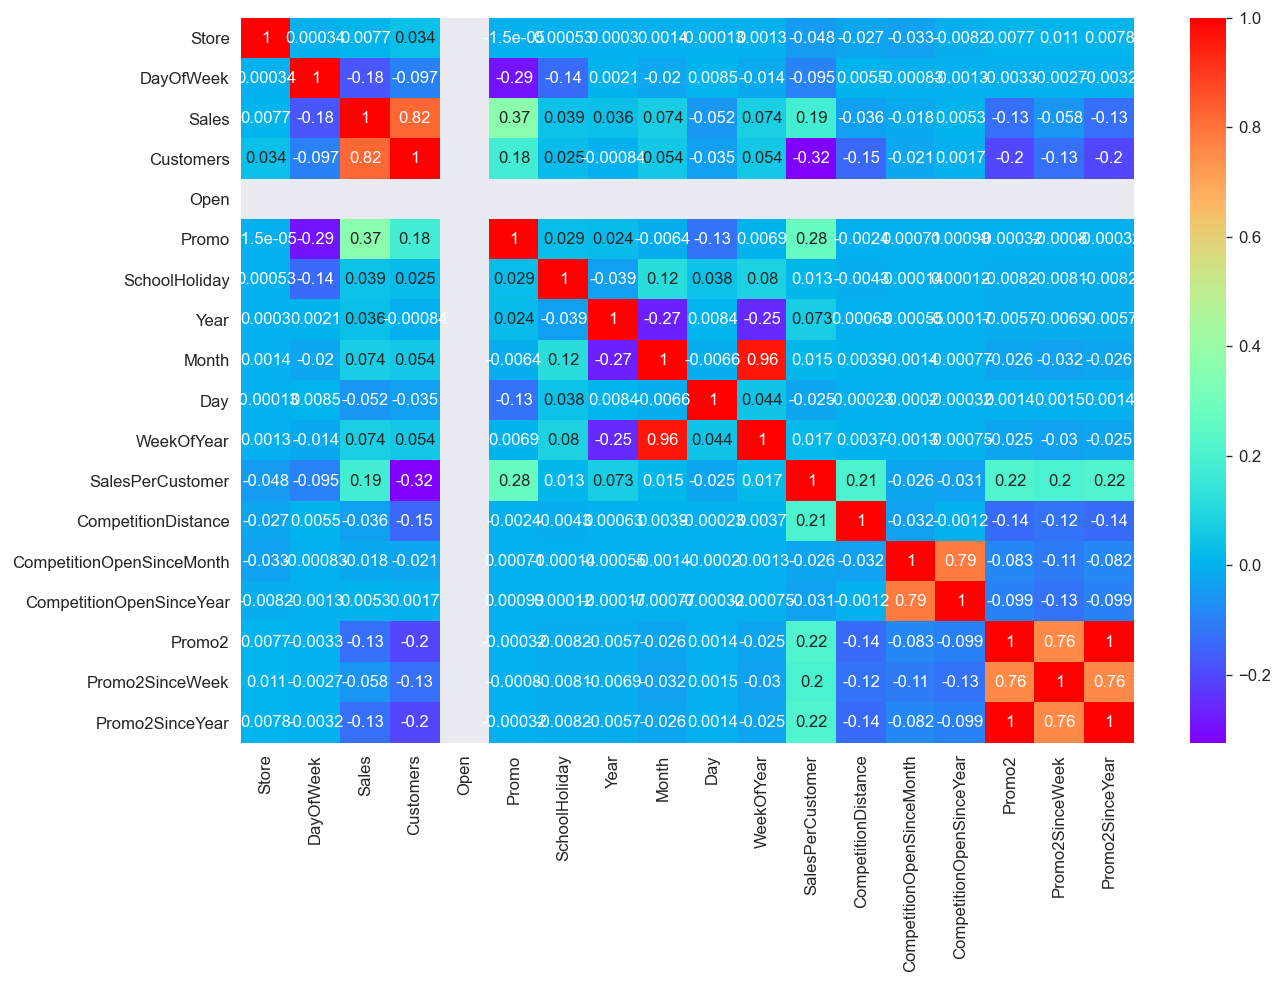

In [78]:
plt.figure(figsize = (12,8), dpi =120)
sns.heatmap(train_store.corr(), cmap = 'rainbow',annot= True)

### This is to see how different columns are correlated to each other

* We can see that all types of Promos and SalesPerCustomer are decent enough correlated
* All types of Promos and Sales are decent enough correlated
* Sales and Customers are higly correlated
* And all columns with themselves are highly correlated

# Lets see how stores are performing

In [80]:
train_store.groupby('StoreType')['Sales'].describe()

count          mean          std     min      25%     50%  \
StoreType                                                                 
a          457042.0   6925.697986  3277.351589    46.0  4695.25  6285.0   
b           15560.0  10233.380141  5155.729868  1252.0  6345.75  9130.0   
c          112968.0   6933.126425  2896.958579   133.0  4916.00  6408.0   
d          258768.0   6822.300064  2556.401455   538.0  5050.00  6395.0   

                75%      max  
StoreType                     
a           8406.00  41551.0  
b          13184.25  38722.0  
c           8349.25  31448.0  
d           8123.25  38037.0

In [91]:
train_store.groupby('StoreType')[['StoreType','Customers', 'Sales']].head()

StoreType  Customers  Sales
0             c        555   5263
1             c        546   5020
2             c        523   4782
3             c        560   5011
4             c        612   6102
781           a        625   6064
782           a        601   5567
783           a        727   6402
784           a        646   5671
785           a        638   6627
9388          d        568   8821
9389          d        474   7648
9390          d        406   6648
9391          d        446   6819
9392          d        527   7926
63445         b        971   7791
63446         b       1000   7187
63447         b        889   7719
63448         b        920   7533
63449         b        956   7788

In [83]:
train_store.groupby('StoreType')[['Customers', 'Sales']].sum()

Customers       Sales
StoreType                       
a          363541431  3165334859
b           31465616   159231395
c           92129705   783221426
d          156904995  1765392943

In [92]:
temp_df = train_store.groupby('StoreType')[['Customers', 'Sales']].sum()

In [93]:
temp_df['SalesPerCustomer'] = temp_df['Sales']/temp_df['Customers']

In [94]:
temp_df

Customers       Sales  SalesPerCustomer
StoreType                                         
a          363541431  3165334859          8.706944
b           31465616   159231395          5.060489
c           92129705   783221426          8.501291
d          156904995  1765392943         11.251350

Now this shows that even though we got the feeling that **store b** was best and **store d** was worst (By seeing the average) we forgot std dev.  
This can lead to false interpretation. So we confirmed it with SalesPerCustomer and thus we didn't fall in stats trap ;)

In [95]:
train_store['Promo'].value_counts()

0    467463
1    376875
Name: Promo, dtype: int64

## Let's check monthly wise

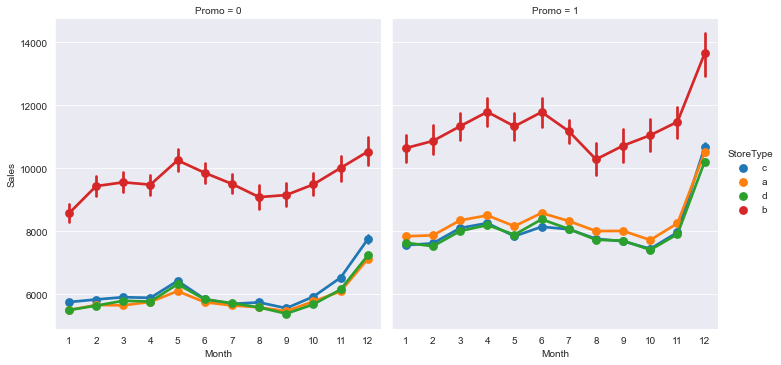

In [99]:
sns.catplot(data = train_store, x = 'Month', y = "Sales", col = 'Promo',hue = 'StoreType', kind = 'point') 

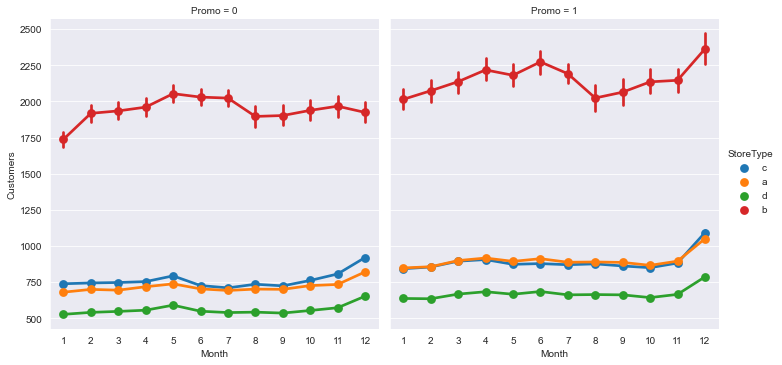

In [100]:
sns.catplot(data = train_store, x = 'Month', y = "Customers", col = 'Promo',hue = 'StoreType', kind = 'point') 

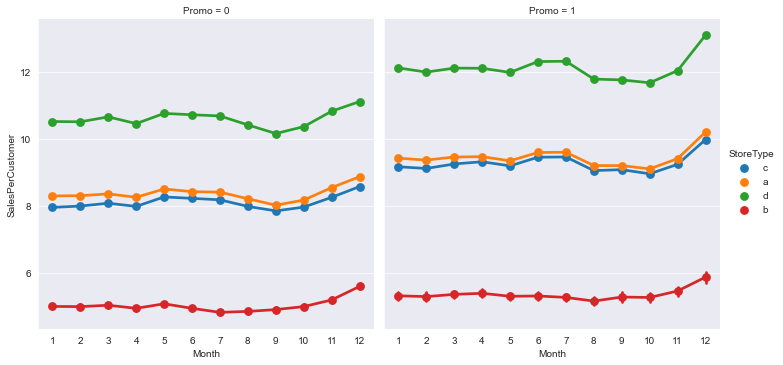

In [102]:
sns.catplot(data = train_store, x = 'Month', y = "SalesPerCustomer", col = 'Promo',hue = 'StoreType', kind = 'point')

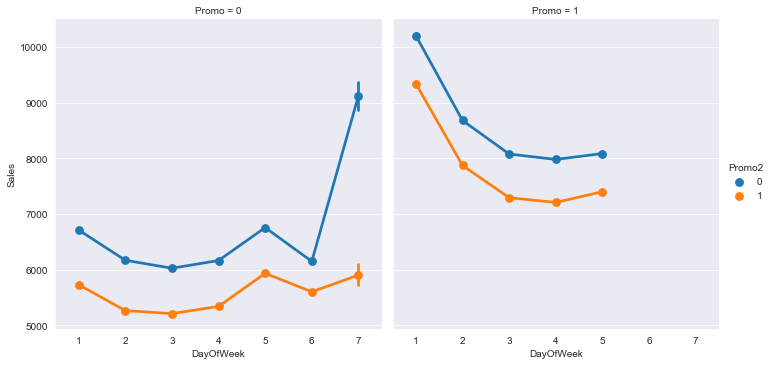

In [103]:
sns.catplot(data = train_store, x = 'DayOfWeek', y = "Sales", col = 'Promo',hue = 'Promo2', kind = 'point')

**StoreType B** as the most selling and performant one, in reality it is **not true** as mentioned above. The highest SalePerCustomer amount is observed at the **StoreType D**, about 12$ **with Promo and** 10$ without. As for **StoreType A and C** it is about 9$.

Low SalePerCustomer amount for StoreType B describes that people buy **less expensive things** or in **small quantity** in B store.

_**It can also be noted that Promo 2 was less successful than Promo 1. Let's try to see if we can find the reason**_

In [104]:
train_store['CompetitionOpen'] = 12 * (train_store.Year - train_store.CompetitionOpenSinceYear) + \
        (train_store.Month - train_store.CompetitionOpenSinceMonth)
    
# Promo open time
train_store['PromoOpen'] = 12 * (train_store.Year - train_store.Promo2SinceYear) + \
        (train_store.WeekOfYear - train_store.Promo2SinceWeek) / 4.0

# replace NA's by 0
train_store.fillna(0, inplace = True)

# average PromoOpen time and CompetitionOpen time per store type
train_store.loc[:, ['StoreType', 'Sales', 'Customers', 'PromoOpen', 'CompetitionOpen']].groupby('StoreType').mean()

Sales    Customers     PromoOpen  CompetitionOpen
StoreType                                                          
a           6925.697986   795.422370  12918.492198      7115.514452
b          10233.380141  2022.211825  17199.328069     11364.495244
c           6933.126425   815.538073  12158.636107      6745.418694
d           6822.300064   606.353935  10421.916846      9028.526526

In [105]:
train_store.head()

Store  DayOfWeek  Sales  Customers  Open  Promo StateHoliday  \
0      1          5   5263        555     1      1            0   
1      1          4   5020        546     1      1            0   
2      1          3   4782        523     1      1            0   
3      1          2   5011        560     1      1            0   
4      1          1   6102        612     1      1            0   

   SchoolHoliday  Year  Month  ...  Assortment  CompetitionDistance  \
0              1  2015      7  ...           a               1270.0   
1              1  2015      7  ...           a               1270.0   
2              1  2015      7  ...           a               1270.0   
3              1  2015      7  ...           a               1270.0   
4              1  2015      7  ...           a               1270.0   

   CompetitionOpenSinceMonth CompetitionOpenSinceYear Promo2  Promo2SinceWeek  \
0                        9.0                   2008.0      0              0.0   
1                        9.0                   2008.0      0              0.0   
2                        9.0                   2008.0      0              0.0   
3                        9.0                   2008.0      0              0.0   
4                        9.0                   2008.0      0              0.0   

   Promo2SinceYear  PromoInterval  CompetitionOpen  PromoOpen  
0              0.0              0             82.0   24187.75  
1              0.0              0             82.0   24187.75  
2              0.0              0             82.0   24187.75  
3              0.0              0             82.0   24187.75  
4              0.0              0             82.0   24187.75  

[5 rows x 24 columns]

# Conclusion of EDA
* The most sale and most crowded type of Store is **Store A**.
* The best **"Sale per Customer"** is **StoreType D** indicates to the higher Buyer Cart. To benefit from this fact, We can consider proposing bigger variety of its products.
* Low SalePerCustomer amount for StoreType B indicates to the possible fact that people shop there essentially for **"small"** things. Eventhough this StoreType generated the least amount of sales and customers over the whole period, it shows a great potential.
* Promo2 alone doesn't seem to be correlated to any significant change in the Sales amount.

In [1]:
# Done